In [2]:
import numpy as np

In [3]:
z = np.zeros(10)
z

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [4]:
type(z)

numpy.ndarray

In [5]:
z.shape  # dimesionless, neither a row nor column vector

(10,)

In [6]:
z.shape = (10, 1)  # give it dimension: 10 rows 1 column, 10x1 column vector
z

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [7]:
z.shape = (1, 10)  # convert it to a row vector
z

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [8]:
z = np.zeros(4)
z.shape = (2, 2)  # convert from dimensionless array to 2x2 matrix
z

array([[0., 0.],
       [0., 0.]])

In [9]:
# create an identity matrix
z = np.eye(3)
z

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [10]:
# create ndarray from a list of lists
z = np.array([[1, 2], [3, 4]])
z

array([[1, 2],
       [3, 4]])

In [11]:
a = np.array((4, 3, 2, 1))
a

array([4, 3, 2, 1])

In [12]:
a.sum()

10

In [13]:
a.mean()

2.5

In [14]:
a.std(ddof=1)  # unbiased sample std estimator

1.2909944487358056

In [15]:
a.max()  # maximum value

4

In [16]:
a.argmax()  # index of the maximum value

0

In [17]:
a.cumsum()  # cumulative sum of elements of a

array([ 4,  7,  9, 10])

In [18]:
a.cumprod()  # cumulative product of elements of a

array([ 4, 12, 24, 24])

In [19]:
a.var()  # biased estimator of a

1.25

In [20]:
a.shape = (2, 2)
a

array([[4, 3],
       [2, 1]])

In [21]:
a.T  # transpose the array. Equivalent to a.transpose()

array([[4, 2],
       [3, 1]])

If z is a nondecreasing array, then z.searchsorted(a) returns the index of the first element of z that is >= a

In [22]:
z = np.linspace(2, 4, 5)
z

array([2. , 2.5, 3. , 3.5, 4. ])

In [23]:
z.searchsorted(2.2)

1

In NumPy, the operators $+, -, *, /, **$ all act **elementwise** on arrays !!

In [24]:
A = np.ones((2, 2))
B = np.ones((2, 2))
A

array([[1., 1.],
       [1., 1.]])

In [25]:
B

array([[1., 1.],
       [1., 1.]])

In [26]:
A + B

array([[2., 2.],
       [2., 2.]])

In [27]:
A * B  # Notice this is NOT the dot product, but an elementwise operation

array([[1., 1.],
       [1., 1.]])

In [28]:
A + 10

array([[11., 11.],
       [11., 11.]])

We can use **@** symbol for matrix vector products (inner products)

In [29]:
A @ B

array([[2., 2.],
       [2., 2.]])

In [30]:
A @ np.eye(2)

array([[1., 1.],
       [1., 1.]])

In [31]:
a = np.array((1, 2, 3))
b = np.array((1, 1, 1))
a @ b  # dot product of a and b

6

## Broadcasting in NumPy ##

In element-wise operations, arrays may not have the same shape.

When this happens, NumPy will automatically expand arrays to the same shape whenever possible.

This useful (but sometimes confusing) feature in NumPy is called **broadcasting**.

In NumPy element-wise matrix-vector sums or products, unlike in linear algebra, if vector $\underline{b}$ is dimensionless (where something like shape.b = (3, )) then vector $\underline{b}$ is broadcasted as **rows** of a 3x3 matrix !!!

In [32]:
a = np.array(
        [[1, 2, 3], 
         [4, 5, 6], 
         [7, 8, 9]])
b = np.array([3, 6, 9])  # shape.b == (3,)  where b is dimensionless

a + b

# NumPy will automatically expand b -> (3,) to b -> (3, 3) where b = [3 6 9]
#                                                                    [3 6 9]
#                                                                    [3 6 9]

array([[ 4,  8, 12],
       [ 7, 11, 15],
       [10, 14, 18]])

However, if it is explicitly a column vector where shape.b = (3, 1), then it is broadcasted as **columns** of a 3x3 matrix !!

In [33]:
b.shape = (3, 1)
b

array([[3],
       [6],
       [9]])

In [34]:
a + b

# NumPy will automatically expand b -> (3,) to b -> (3, 3) where b = [3 3 3]
#                                                                    [6 6 6]
#                                                                    [9 9 9]

array([[ 4,  5,  6],
       [10, 11, 12],
       [16, 17, 18]])

The previous broadcasting operation is equivalent to the following for loop:

In [35]:
rows, columns = a.shape
result = np.empty((3, 3))
for i in range(rows):
    for j in range(columns):
        result[i, j] = a[i, j] + b[i]

result

array([[ 4.,  5.,  6.],
       [10., 11., 12.],
       [16., 17., 18.]])

In [36]:
a = np.array([3, 6, 9])  # a is dimensionless.  a.shape == (3,)
b = np.array([2, 3, 4]) 
b.shape = (3, 1)  # b is a column vector.  b.shape == (3, 1)

a + b

# a is broadcasted as if it's a row vector: a = [3  6  9]
#                                               [3  6  9]
#                                               [3  6  9]

# However because b.shape == (3,1); b is broadcasted as a column vector: b = [2  2  2]
#                                                                            [3  3  3]
#                                                                            [4  4  4]

# So the result of a + b == [5  8  11]
#                           [6  9  12]
#                           [7  10  13]

array([[ 5,  8, 11],
       [ 6,  9, 12],
       [ 7, 10, 13]])

## List of Rules for Broadcasting in NumPy: ##

### **Step 1:** When the dimensions of two arrays do not match, NumPy will expand the one with fewer dimensions by adding dimension(s) on the left of the existing dimensions: ###

* For example, if a -> (3, 3) and b -> (3,), then broadcasting will add a dimension to the left so that b -> (1, 3); Thus, *dimensionless vectors **always** get broadcasted to row vectors*

* If a -> (2, 2, 2) and b -> (2, 2), then broadcasting will add a dimension to the left so that b -> (1, 2, 2);

* If a -> (3, 2, 2) and b -> (2,), then broadcasting will add two dimensions to the left so that b -> (1, 1, 2) (you can also see this process as going through Step 1 twice).

### **Step 2:** When the two arrays have the same dimension but different shapes, NumPy will try to expand dimensions where the shape index is 1: ###

* For example, if a -> (1, 3) and b -> (3, 1), then broadcasting will expand dimensions with shape 1 in both a and b so that a -> (3, 3) and b -> (3, 3);

* If a -> (2, 2, 2) and b -> (1, 2, 2), then broadcasting will expand the first dimension of b so that b -> (2, 2, 2);

* If a -> (3, 2, 2) and b -> (1, 1, 2), then broadcasting will expand b on all dimensions with shape 1 so that b -> (3, 2, 2).

### Step 3: After Step 1 and 2, if the two arrays still do not match, a ValueError will be raised. For example, suppose a -> (2, 2, 3) and b -> (2, 2) ###

* By Step 1, b will be expanded to b -> (1, 2, 2);

* By Step 2, b will be expanded to b -> (2, 2, 2);

* We can see that they do not match each other after the first two steps. Thus, a ValueError will be raised

In [37]:
# a -> (2, 2, 2) and  b gets broadcasted to b -> (1, 2, 2)

a = np.array(
    [[[1, 2], 
      [2, 3]], 

     [[2, 3], 
      [3, 4]]])
print(f'the shape of array a is {a.shape}')

b = np.array(
    [[1,7],
     [7,1]])
print(f'the shape of array b is {b.shape}')

a + b

the shape of array a is (2, 2, 2)
the shape of array b is (2, 2)


array([[[ 2,  9],
        [ 9,  4]],

       [[ 3, 10],
        [10,  5]]])

## Vectorized Functions in NumPy ##

NumPy provides versions of the standard functions log, exp, sin, etc. that act element-wise on arrays:

In [38]:
z = np.array([1, 2, 3])
np.sin(z)  # np.sin() function acts element-wise on the array (no need for loops). In NumPy-speak, they are also called ufuncs, which stands for “universal functions”.

array([0.84147098, 0.90929743, 0.14112001])

In [39]:
x = np.random.randn(4)
x

array([ 0.37489558, -0.76800347, -0.60322142,  1.12066809])

In [40]:
np.where(x > 0, 1, 0)  # Insert 1 if x > 0 true, otherwise 0

array([1, 0, 0, 1])

In [41]:
def f(x):  # scalar function
    return 1 if x > 0 else 0

# to vectorize it, we can use np.vectorize()
f = np.vectorize(f)
f(x)                # Passing the same vector x as in the previous example

array([1, 0, 0, 1])

## Comparisons on NumPy ##

Comparisons are done element-wise on NumPy:

In [42]:
y = np.array([2, 3])
z = np.array([2, 3])
y == z

array([ True,  True])

In [43]:
y[0] = 5  # mutate the first element of y
y == z

array([False,  True])

In [44]:
z = np.linspace(0, 10, 5)
z

array([ 0. ,  2.5,  5. ,  7.5, 10. ])

In [45]:
b = z > 3
b

array([False, False,  True,  True,  True])

In [46]:
z[b]

array([ 5. ,  7.5, 10. ])

In [47]:
# Easier, one step conditional slicing:
z[z > 3]

array([ 5. ,  7.5, 10. ])

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,6)
from datetime import datetime as dt

### Exercise 9.1 ###

In [49]:
# My method
def p(x, coef):
    """

    Args:
        x (float): value of the input x
        coef (numpy array): array of coefficient values from a_0 to a_n
    """
    start = dt.now()
    
    n = len(coef)
    powarr = np.linspace(0, n-1, n, dtype=int)
    
    end = dt.now()
    runtime = (end - start).total_seconds()
    print(f"My runtime = {runtime * 1000:.2f} ms")
    
    return (coef * (x**powarr)).sum()

In [50]:
x = 2
coef = np.linspace(2, 4, 3)

p(x, coef)

My runtime = 0.10 ms


24.0

In [51]:
# let's test
x = 2
coef = np.linspace(2, 4, 3)
print(coef)
print(p(x, coef))
# For comparison
q = np.poly1d(np.flip(coef))
print(q(x))

[2. 3. 4.]
My runtime = 0.29 ms
24.0
24.0


In [52]:
# Another method (official solution) :
def p(x, coef):
    start = dt.now()
    
    X = np.ones_like(coef)
    X[1:] = x
    y = np.cumprod(X)   # y = [1, x, x**2,...]
    
    end = dt.now()
    runtime = (end - start).total_seconds()
    print(f"Official solution runtime = {runtime * 1000:.2f} ms")
    
    return coef @ y

In [53]:
x = 2
coef = np.linspace(2, 4, 3)

p(x, coef)

Official solution runtime = 0.04 ms


24.0

### **My Solution's runtime is worse :((** ###

## Exercise 9.2 ##

Let q be a NumPy array of length n with q.sum() == 1. \
Suppose that q represents a probability mass function.

In [54]:
from random import uniform

def sample(q):
    """Draw a random variable U~Uni[0, 1] and return its interval index (0, 1, ..., n-1)

    Args:
        q (numpy array): probability for intervals I_0, I_1, ..., I_n-1
    """
    a = 0.0
    U = uniform(0, 1)
    for i in range(len(q)):
        if a < U <= a + q[i]:
            return i
        a = a + q[i]
        
# Vectore this using NumPy.

In [55]:
def vecSample(q):
    """Draw a random variable U~Uni[0, 1] and return its interval index (0, 1, ..., n-1)

    Args:
        q (numpy array): probability for intervals I_0, I_1, ..., I_n-1
    """
    assert abs(q.sum() - 0.01) <= 1, "q is not a valid probability measure."
    U = uniform(0, 1)
    return q.cumsum().searchsorted(U)  # index of the first value where the condition (q.cumsum() >= U) is True.

In [56]:
q = np.array([0.2, 0.3, 0.5])
vecSample(q)

2

(array([200.,   0.,   0.,   0.,   0., 318.,   0.,   0.,   0., 482.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

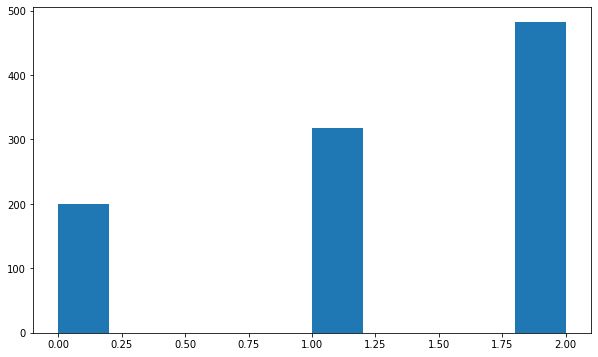

In [57]:
vecSample_array = np.array([vecSample(q) for i in range(1000)])

plt.hist(vecSample_array)

# Our code seems to be working correctly.

If you can, implement the functionality as a class called DiscreteRV, where

the data for an instance of the class is the vector of probabilities q

the class has a draw() method, which returns one draw according to the algorithm described above

If you can, write the method so that draw(k) returns k draws from q.

In [58]:
class DiscreteRV(object):
    def __init__(self, q, drawmethod=vecSample):
        self.q = q
        self.drawmethod = drawmethod
    
    def draw_one(self):
        return self.drawmethod(q)
    
    def draw(self, k):
        """Draws k values according to drawmethod. Returns the drawn values in a numpy array.

        Args:
            k (int): number of draws
        """
        return np.array([self.drawmethod(q) for i in range(k)])

In [59]:
q = np.array([0.3, 0.3, 0.3, 0.1])
myRV = DiscreteRV(q)

In [60]:
myRV.draw(10)

array([0, 0, 2, 1, 2, 2, 3, 0, 1, 0])

### Exercise 9.4 ###

Part1: Try to replicate this simple example using for loops and compare your results with the broadcasting operation below:

In [61]:
np.random.seed(123)
x = np.random.randn(4, 4)
y = np.random.randn(4)  # Here y will be broadcasted to a row vector y -> (1, 4)
A = x / y
print(A)

[[-0.49214189  0.45607819  0.28183596 -3.90043439]
 [-0.26229311  0.75518888 -2.41688145 -1.11063629]
 [ 0.57387869 -0.39635354 -0.67614513 -0.2452416 ]
 [ 0.676082   -0.29216483 -0.44218937 -1.12471925]]


In [62]:
# My solution:
np.random.seed(123)
x = np.random.randn(4, 4)
y = np.random.randn(4)

A = np.zeros((4, 4))

for i in range(x.shape[0]):  # iterate over rows of x
    for j in range(x.shape[1]):  # iterate over cols of x
        A[i, j] = x[i, j] / y[j]

print(A)

[[-0.49214189  0.45607819  0.28183596 -3.90043439]
 [-0.26229311  0.75518888 -2.41688145 -1.11063629]
 [ 0.57387869 -0.39635354 -0.67614513 -0.2452416 ]
 [ 0.676082   -0.29216483 -0.44218937 -1.12471925]]


Part2: Move on to replicate the result of the following broadcasting operation. Meanwhile, compare the speeds of broadcasting and the for loop you implement:

In [63]:
import quantecon as qe

np.random.seed(123)
x = np.random.randn(1000, 100, 100)
y = np.random.randn(100)

qe.tic()
B = x / y
qe.toc()

TOC: Elapsed: 0:00:0.10


0.10434937477111816

In [64]:
# My solution
np.random.seed(123)
x = np.random.randn(1000, 100, 100)
y = np.random.randn(100)  # Here y will be broadcasted to a vector y -> (1, 1, 100)

qe.tic()

A = np.zeros((1000, 100, 100))
for k in range(x.shape[0]):  # iterate over depth of x
    for i in range(x.shape[1]):  # iterate over rows of x
        for j in range(x.shape[2]):  # iterate over rows of x
            A[k, i, j] = x[k, i, j] / y[j]

qe.toc()

TOC: Elapsed: 0:00:5.18


5.1878674030303955

for loop has way worse runtime than vectorized broadcasting in NumPy

In [65]:
print(A)

[[[ 1.85764005 -0.89419976  0.24485371 ... -3.04214618  0.17711597
   -0.22643801]
  [-1.09863014  1.77333433  0.61630351 ... -0.24732757 -0.15931155
   -0.13015397]
  [-1.20344529  0.53624915  1.90420857 ...  0.92748804  0.07494711
    0.48954772]
  ...
  [-1.09763323  0.68632802 -1.21568707 ... -3.87025031 -0.19456046
    0.18331773]
  [-0.47546852 -0.16883695  2.92991418 ... -0.05967182 -0.20796073
   -0.49082994]
  [ 1.14380091  1.93460538 -0.76305492 ... -1.0537099   0.27167901
    0.57963424]]

 [[ 2.12344323  0.28058176 -0.73457091 ...  3.55049699  0.59737154
   -0.31414907]
  [ 1.40074417 -0.09113173  0.50276294 ... -1.85572391  0.13914077
   -0.93776321]
  [ 2.35739042 -0.79089649  0.20835615 ... -0.11001198  0.86250367
   -1.26949634]
  ...
  [ 2.11831946  0.15242396 -0.17269536 ...  0.03469371 -0.06074779
    0.10114045]
  [-0.08300138  0.47232405 -0.89930099 ...  0.66104947 -0.45183377
   -1.05885526]
  [ 0.282155   -1.44848315 -1.25832989 ... -3.12998376  0.48762406
    0.

In [66]:
print(np.array_equal(A, B))

True


# OPTION DATA AND ATTRIBUTES #

In [67]:
import datetime

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
from yahoo_fin import options

In [68]:
# https://medium.com/@txlian13/webscrapping-options-data-with-python-and-yfinance-e4deb0124613


def options_chain(symbol):
    tk = yf.Ticker(symbol)
    # Expiration dates
    exps = tk.options

    # Get options for each expiration
    options = pd.DataFrame()
    for e in exps:
        opt = tk.option_chain(e)
        opt = pd.DataFrame().append(opt.calls).append(opt.puts)
        opt["expirationDate"] = e
        options = options.append(opt, ignore_index=True)

    # Bizarre error in `yfinance` that gives the wrong expiration date
    # Add 1 day to get the correct expiration date
    options["expirationDate"] = pd.to_datetime(
        options["expirationDate"]
    ) + datetime.timedelta(days=1)
    options["dte"] = (
        options["expirationDate"] - datetime.datetime.today()
    ).dt.days / 365

    # Boolean column if the option is a CALL
    options["CALL"] = options["contractSymbol"].str[4:].apply(lambda x: "C" in x)

    # options[['bid', 'ask', 'strike']] = options[['bid', 'ask', 'strike']].apply(pd.to_numeric)
    options[["bid", "ask", "strike", "volume", "Implied Volatility"]] = options[
        ["bid", "ask", "strike", "volume", "Implied Volatility"]
    ].apply(pd.to_numeric)
    options["mark"] = (
        options["bid"] + options["ask"]
    ) / 2  # Calculate the midpoint of the bid-ask

    # Drop unnecessary and meaningless columns
    options = options.drop(
        columns=[
            "contractSize",
            "currency",
            "change",
            "percentChange",
            "lastTradeDate",
            "lastPrice",
        ]
    )

    return options

In [69]:
nflx_dates = options.get_expiration_dates("nflx")
nflx_dates

['October 6, 2023',
 'October 13, 2023',
 'October 20, 2023',
 'October 27, 2023',
 'November 3, 2023',
 'November 10, 2023',
 'November 17, 2023',
 'December 15, 2023',
 'January 19, 2024',
 'March 15, 2024',
 'June 21, 2024',
 'September 20, 2024',
 'January 17, 2025',
 'June 20, 2025',
 'December 19, 2025',
 'January 16, 2026']

In [70]:
info = {}
for date in nflx_dates:
    info[date] = options.get_options_chain("nflx")
type(info)

KeyboardInterrupt: 

In [ ]:
exp_dates = list(info.keys())
exp_dates

['October 6, 2023',
 'October 13, 2023',
 'October 20, 2023',
 'October 27, 2023',
 'November 3, 2023',
 'November 10, 2023',
 'November 17, 2023',
 'December 15, 2023',
 'January 19, 2024',
 'March 15, 2024',
 'June 21, 2024',
 'September 20, 2024',
 'January 17, 2025',
 'June 20, 2025',
 'December 19, 2025',
 'January 16, 2026']

In [ ]:
z1 = info[exp_dates[0]]
type(z1)

dict

In [ ]:
z1.keys()

dict_keys(['calls', 'puts'])

In [ ]:
z2 = z1["calls"]
z2

,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility
0,NFLX231006C00100000,2023-09-14 9:46AM EDT,100.0,303.40,275.05,279.50,0.00,-,-,1,573.34%
1,NFLX231006C00150000,2023-09-21 11:15AM EDT,150.0,236.23,225.30,229.55,0.00,-,-,12,410.35%
2,NFLX231006C00200000,2023-09-29 3:32PM EDT,200.0,176.70,175.15,179.50,-68.93,-28.06%,5,1,292.97%
3,NFLX231006C00230000,2023-09-28 9:33AM EDT,230.0,144.28,145.40,149.95,0.00,-,1,1,147.27%
4,NFLX231006C00250000,2023-09-11 9:45AM EDT,250.0,199.50,125.40,129.65,0.00,-,3,3,205.96%
...,...,...,...,...,...,...,...,...,...,...,...
68,NFLX231006C00540000,2023-09-14 1:30PM EDT,540.0,0.03,0.00,0.01,0.00,-,7,22,82.81%
69,NFLX231006C00550000,2023-09-21 1:02PM EDT,550.0,0.02,0.00,0.01,0.00,-,5,22,87.50%
70,NFLX231006C00570000,2023-09-14 1:29PM EDT,570.0,0.01,0.00,0.01,0.00,-,50,59,93.75%
71,NFLX231006C00600000,2023-09-22 9:51AM EDT,600.0,0.01,0.00,0.01,0.00,-,21,28,106.25%


In [ ]:
type(z2)

pandas.core.frame.DataFrame

In [ ]:
# Let's compute Bid-Ask spread
z2["Spread"] = z2["Ask"] - z2["Bid"]
z2

,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility,Spread
0,NFLX231006C00100000,2023-09-14 9:46AM EDT,100.0,303.40,275.05,279.50,0.00,-,-,1,573.34%,4.45
1,NFLX231006C00150000,2023-09-21 11:15AM EDT,150.0,236.23,225.30,229.55,0.00,-,-,12,410.35%,4.25
2,NFLX231006C00200000,2023-09-29 3:32PM EDT,200.0,176.70,175.15,179.50,-68.93,-28.06%,5,1,292.97%,4.35
3,NFLX231006C00230000,2023-09-28 9:33AM EDT,230.0,144.28,145.40,149.95,0.00,-,1,1,147.27%,4.55
4,NFLX231006C00250000,2023-09-11 9:45AM EDT,250.0,199.50,125.40,129.65,0.00,-,3,3,205.96%,4.25
...,...,...,...,...,...,...,...,...,...,...,...,...
68,NFLX231006C00540000,2023-09-14 1:30PM EDT,540.0,0.03,0.00,0.01,0.00,-,7,22,82.81%,0.01
69,NFLX231006C00550000,2023-09-21 1:02PM EDT,550.0,0.02,0.00,0.01,0.00,-,5,22,87.50%,0.01
70,NFLX231006C00570000,2023-09-14 1:29PM EDT,570.0,0.01,0.00,0.01,0.00,-,50,59,93.75%,0.01
71,NFLX231006C00600000,2023-09-22 9:51AM EDT,600.0,0.01,0.00,0.01,0.00,-,21,28,106.25%,0.01


Text(0, 0.5, 'Bid-Ask Spread')

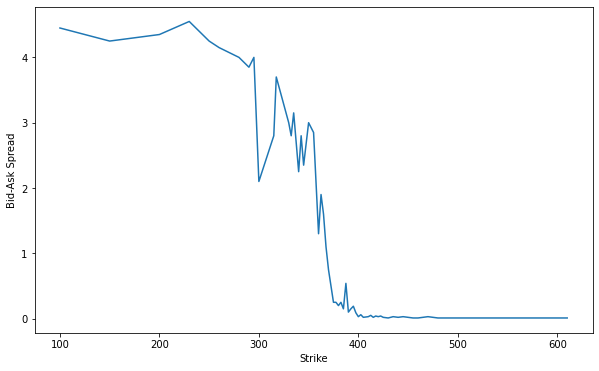

In [ ]:
# And plot the spread against strike
plt.plot(z2.Strike, z2.Spread)
plt.xlabel("Strike")
plt.ylabel("Bid-Ask Spread")